# Enzymes and Drug Metabolism

Welcome! In this notebook, we will be exploring how genetic variation in CYP2D6 (a liver enzyme) affects how patients metabolize common drugs like codeine or antidepressants. 

By the end of this notebook, you will have familiarity with:
- Enzyme inhibition
- fill in

Enzyme overview: The CYP450 family of enzymes, particularly CYP2D6, plays a critical role in metabolizing various drugs. Variations in the CYP2D6 gene (due to single nucleotide polymorphisms (SNPs)) can affect how effectively a person processes certain medications. These variations can lead to adverse drug reactions or treatment failures if not accounted for in personalized medicine.

### The Objective:

Explore the genetic variation in the CYP2D6 gene and how it affects drug metabolism, specifically in terms of:
- Metabolizer phenotypes (e.g., poor metabolizer, extensive metabolizer, ultrarapid metabolizer).
- Drug metabolism outcomes for patients using drugs like codeine, tamoxifen, or antidepressants.

Run the cell below to import any neccesary libraries for this notebook.

In [1]:
from utils import *

The data we will be using today is from [PharmGKB](https://www.pharmgkb.org/). PharmGKB (Pharmacogenomics Knowledgebase) is a free, publicly available resource that curates information about how genetic variation affects drug response. It's a key resource for researchers and clinicians working in pharmacogenomics — the study of how genes influence the way people respond to medications.

Today we will be using their database of Variant Associations to study the association between CYP2D6 and drug metabolization. This dataset we are using contains the associations in which the variant affects a drug dose, response, metabolism, etc.

Let's get a better idea of what data we are looking at. 

Here's a short description of the **features** we are going to be focusing on:

- **Gene**: HGNC symbol for the gene involved in the association.
- **Variant/Haplotypes**: dbSNP rsID or haplotype(s) involved in the association. In some cases, an association is based on a gene phenotype group such as "poor metabolizers" or "intermediate activity". In these cases, the gene phenotype is found in this field.
- **Drug(s)**: The drug(s) involved in the association. 
- **Phenotype Category**: Options are "efficacy", "toxicity", "dosage", "metabolism/PK", "PD", "other".
- **Significance**: The significance of the association as stated by the author; options are [yes, no, not stated].
- **Alleles**: The basis for comparison in the annotation. In this field, there may be a variant, one or more haplotypes grouped together, one or more genotypes grouped together or one or more diplotypes grouped together. 
- **Metabolizer types**: This field contains the gene phenotype group, if applicable. I.e., if the association is based on a gene phenotype group such as "poor metabolizers", or if the association is based on individual genotypes that were combined into a gene phenotype group.
- **Population types**: This field indicates the type of population in which the association was studied. There are multiple options including, but not limited to, "in healthy individuals", "in children", "in women". The studied population can be further described in the "Population Phenotypes or diseases" field, in which case the "Population types" field will in with the word "with", such as "in children with".
- **Is/Is Not associated**: This field indicates whether or not an association was found.
- **Notes**: Free text field for notes added by the curator.

You can find the full descriptions [here](https://www.pharmgkb.org/page/downloadVariantAnnotationsHelp).

In [2]:
df = pd.read_csv('variantAnnotations/var_drug_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
mini_view = df[['PMID', 'Gene', 'Variant/Haplotypes' ,'Drug(s)', 'Phenotype Category', 'Significance', 'Alleles', 'Metabolizer types', 'Population types' ,'Is/Is Not associated', 'Notes']]
mini_view.tail()

,PMID,Gene,Variant/Haplotypes,Drug(s),Phenotype Category,Significance,Alleles,Metabolizer types,Population types,Is/Is Not associated,Notes
11397,37763120,CYP2D6,rs1135840,fluoxetine,Metabolism/PK,yes,C,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11401,37763120,CYP2D6,rs1065852,fluoxetine,Metabolism/PK,yes,A,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11467,37307170,CYP2D6,rs28371738,alpha-hydroxymetoprolol,Metabolism/PK,yes,A,NaN,NaN,Associated with,"in a large biobank of ""“real-life” polymedicat..."
12158,34380995,CYP2D6,rs1065852,methadone,Dosage,no,A,NaN,in people with,Not associated with,This variant is referred to as CYP2D6*10 in th...
12446,22354160,CYP2D6,rs3892097,nevirapine,"Toxicity, Metabolism/PK",no,T,NaN,in people with,Not associated with,NaN


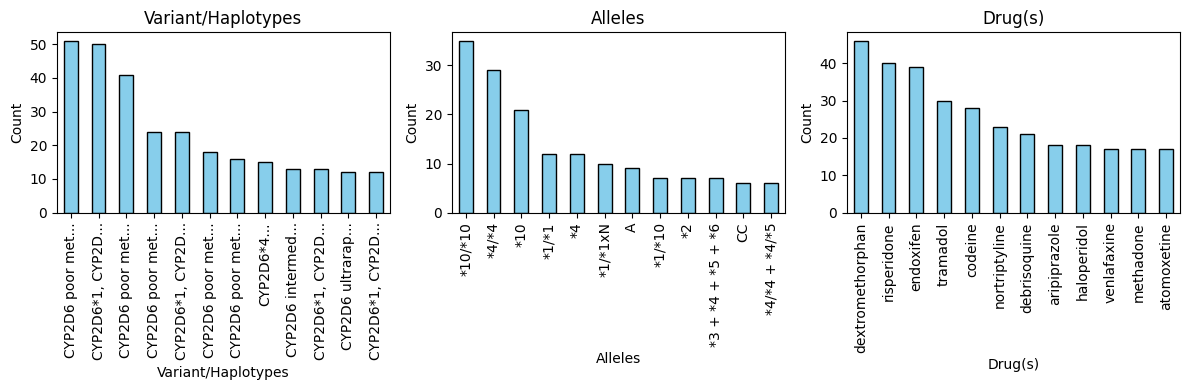

In [3]:
display_data_counts(df)

- Analyze variant data from PharmGKB.
- Predict impact of different genotypes (e.g., poor vs ultrarapid metabolizers).
- Link to adverse drug reactions or treatment failure.
- Visualize allele frequencies across populations.

Now we are going to look at a slightly different view of this data. #Contains associations in which the variant affects a phenotype, with or without drug information.


In [4]:
phenotype = pd.read_csv('variantAnnotations/var_pheno_ann.tsv', sep='\t')
phenotype = phenotype.loc[phenotype['Gene'] == 'CYP2D6']
top_k = 7

@interact(x=widgets.Dropdown(options = ['Metabolizer types', 'Population types'], value = 'Metabolizer types'))
def g(x):
    display_heatmap(phenotype, x, 7)

interactive(children=(Dropdown(description='x', options=('Metabolizer types', 'Population types'), value='Meta…

Phenotypes are the "bridge" between genotype and treatment outcomes.
A variant alone doesn’t tell you much unless you know how it expresses itself. The Phenotype Category captures that expression — for example, "poor metabolizer," "ultra-rapid metabolizer," "reduced function," or "non-responder."

Drug effects often depend on the patient's phenotype.
If a gene variant causes a person to metabolize a drug too slowly (*poor metabolizer*), the drug could build up in their body, increasing the risk of toxicity.
If a variant leads to fast metabolism (*ultra-rapid metabolizer*), the drug might be cleared before it has any therapeutic effect.

Clinical decisions depend on the Phenotype Category.
Physicians don't usually make dosing decisions based directly on the genetic variant; they make decisions based on the predicted phenotype.
- A "poor metabolizer" of warfarin (a blood thinner) would get a lower starting dose.
- An "ultra-rapid metabolizer" of codeine might be advised to avoid the drug entirely, because they could quickly convert it into morphine and risk overdose.

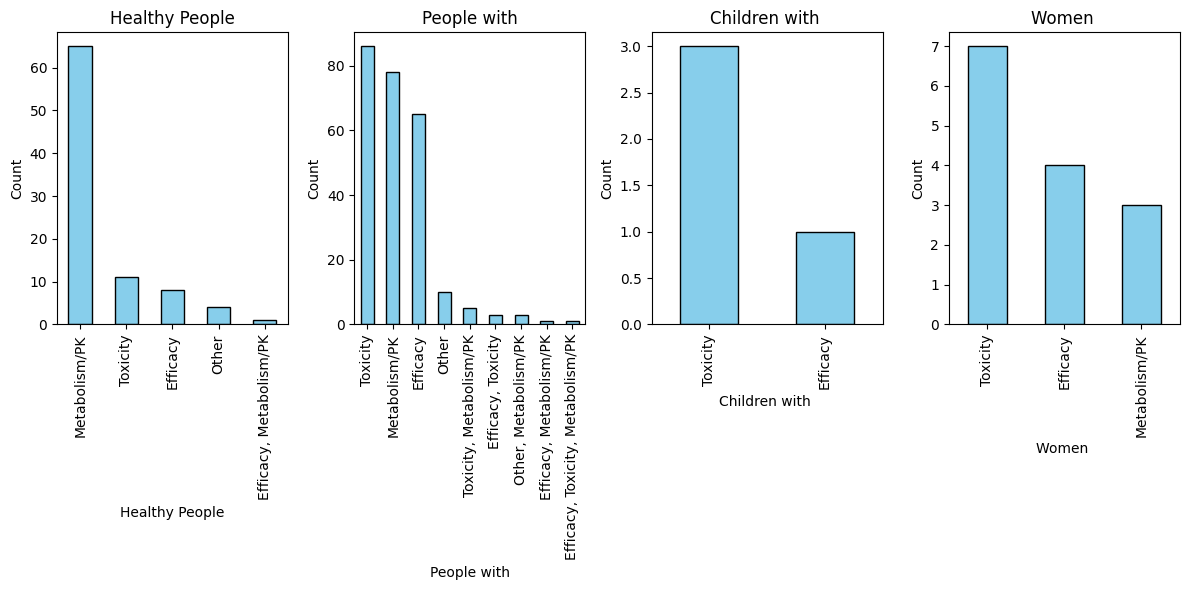

In [5]:
display_population_type_data(phenotype, 'Phenotype Category')

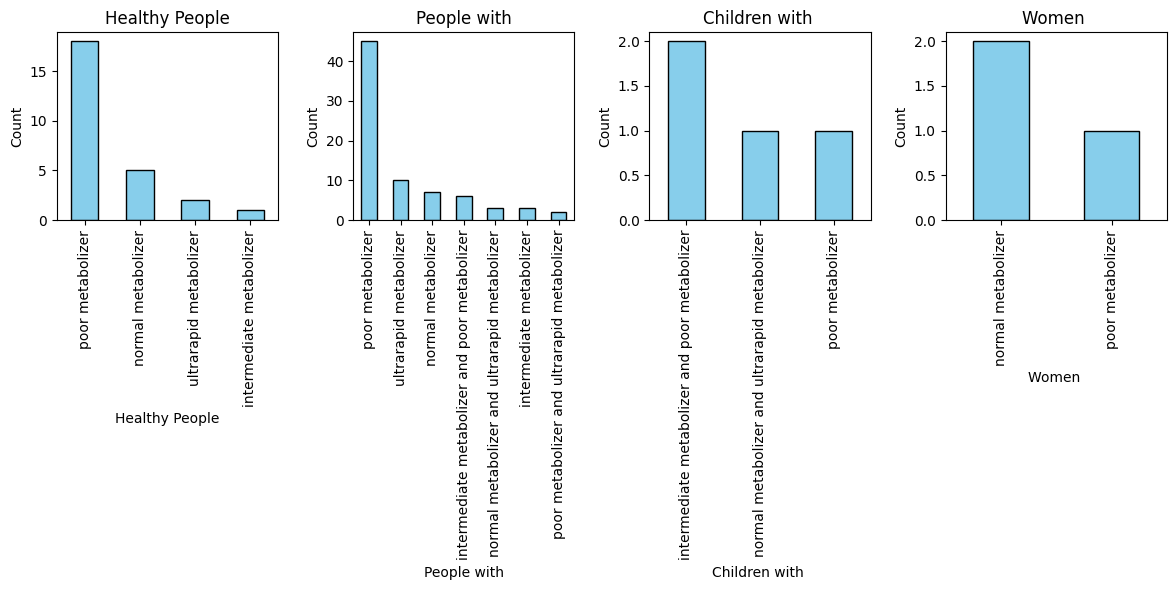

In [6]:
display_population_type_data(phenotype, 'Metabolizer types')


 Support Vector Machine (SVM)
Pros: Good for high-dimensional, small sample data.

Use case: When your feature space is large (e.g., gene/phenotype embeddings).

Good for: Bioinformatics problems with sparse features.

In [7]:
X = df[['Variant/Haplotypes' ,'Drug(s)', 'Phenotype Category', 'Alleles', 'Metabolizer types',
         'Population types', 'Population Phenotypes or diseases']]
y = df['Is/Is Not associated']

run_SVM(X, y)

                     precision    recall  f1-score   support

    Associated with       0.83      0.98      0.90       120
Not associated with       0.33      0.04      0.07        25

           accuracy                           0.82       145
          macro avg       0.58      0.51      0.49       145
       weighted avg       0.75      0.82      0.76       145



### Reflection Questions

**Question 1:**
In the case of CYP2D6, a key enzyme involved in drug metabolism, how might feedback inhibition regulate its activity in response to the accumulation of certain metabolites? Discuss the potential consequences if feedback inhibition was not properly functioning in the context of drug metabolism.

**Question 2:** Why is it important for the body to tightly regulate the activity of enzymes like CYP2D6? How would chemical chaos impact a patient's response to drugs if CYP2D6 were overactive or underactive?

Coenzymes play an important role in enzyme activity. For enzymes like CYP2D6, which metabolize various drugs, what role do you think organic coenzymes (such as vitamins) might play in modulating enzyme activity? Provide a specific example, if possible, of a coenzyme that might influence CYP2D6 function and its ability to metabolize drugs like tamoxifen or codeine.

As with all enzymes, CYP2D6 activity can be influenced by environmental factors such as temperature and pH. In the context of drug metabolism, how might a change in pH or temperature (such as a fever or a sudden temperature shift) affect the activity of CYP2D6 and, consequently, the metabolism of drugs? What would happen if CYP2D6 is not working within the optimal temperature or pH range?